# Simple models: memorization and averages

In [ ]:
# install required packages
# %pip install numpy pandas scikit-learn

## Create some data

In [1]:
import pandas as pd

C:\Users\manolo\AppData\Local\Temp\ipykernel_23164\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
beds = [3, 2, 1, 1, 4]
baths = [1.5, 1, 1, 1, 1]
lat = [40.7145, 40.7947, 40.7388, 40.7539, 40.8241]
long = [-73.9425, -73.9667, -74.0018, -73.9677, -73.9493]
price = [3000, 5465, 2850, 3275, 3350]

In [4]:
apt_dict = {"bedrooms":beds, "bathrooms":baths, "latitude":lat, "longitude":long, "price":price}

apts = pd.DataFrame(apt_dict)
apts

,bedrooms,bathrooms,latitude,longitude,price
0,3,1.5,40.7145,-73.9425,3000
1,2,1.0,40.7947,-73.9667,5465
2,1,1.0,40.7388,-74.0018,2850
3,1,1.0,40.7539,-73.9677,3275
4,4,1.0,40.8241,-73.9493,3350


## Model based on memorization

In [8]:
model = {}

In [9]:
for _, row in apts.iterrows():
    model[tuple(row.values[0:4])] = row.values[4]    

In [10]:
model

{(3.0, 1.5, 40.7145, -73.9425): 3000.0,
 (2.0, 1.0, 40.7947, -73.9667): 5465.0,
 (1.0, 1.0, 40.7388, -74.0018): 2850.0,
 (1.0, 1.0, 40.7539, -73.9677): 3275.0,
 (4.0, 1.0, 40.8241, -73.9493): 3350.0}

In [11]:
model[(1, 1, 40.7539, -73.9677)]

3275.0

In [12]:
model[(1, 1, 40., -73.)]

KeyError: (1, 1, 40.0, -73.0)

#### Error on training data

$$
\textrm{Mean Squared Error (MSE)} = \frac{1}{n}\sum_{i=0}^{n} (y_i - \hat{y}_i)^2
$$

In [13]:
def predict(apt_tuple):
    prediction = model[apt_tuple]
    return prediction

In [14]:
def calc_MSE(apts_df):
    total_error = 0
    for _, row in apts_df.iterrows():
        prediction = predict(tuple(row.values[0:4]) )
        y = row.values[4] 
        total_error += (y - prediction)**2
    return total_error/apts_df.shape[0]


In [15]:
calc_MSE(apts)

0.0

#### Error on new data

> Predictions on new data are not possible!

## Model based on average

#### Create data with non-unique features

In [ ]:
beds = [3, 2, 1, 1, 4, 0, 0, 0, 0]
baths = [1.5, 1, 1, 1, 1, 1, 1, 1, 1]
lat = [40.7145, 40.7947, 40.7388, 40.7539, 40.8241, 40.7073, 40.7073, 40.7073, 40.7073]
long = [-73.9425, -73.9667, -74.0018, -73.9677, -73.9493, -73.9664, -73.9664, -73.9664, -73.9664]
price = [3000, 5465, 2850, 3275, 3350, 3650, 1850, 2950, 2200]

In [ ]:
apt_dict = {"bedrooms":beds, "bathrooms":baths, "latitude":lat, "longitude":long, "price":price}

apts_not_unique = pd.DataFrame(apt_dict)
apts_not_unique

#### Try memorization

In [ ]:
for _, row in apts_not_unique.iterrows():
    model[tuple(row.values[0:4])] = row.values[4] 

In [ ]:
model

In [ ]:
calc_MSE(apts_not_unique)

#### Error on new data

> Still can't predict for new data!

#### Try averaging

In [ ]:
group_cols = ['bedrooms', 'bathrooms', 'latitude', 'longitude']
apts_avg = apts_not_unique.groupby(group_cols).agg({'price': ['mean']}).reset_index()
apts_avg

In [ ]:
for i, row in apts_avg.iterrows():
    model[tuple(row.values[0:4])] = row.values[4] 

In [ ]:
model

In [ ]:
calc_MSE(apts_not_unique)

#### Error on new data

> Can handle uncertainty in target (price).

> Still can't predict on new data!

#### Try averaging: all apartments

In [ ]:
prediction = apts_not_unique['price'].mean()
prediction

In [ ]:
def calc_MSE_all(apts_df, prediction):
    total_error = 0
    for _, row in apts_df.iterrows():
        y = row.values[4] 
        total_error += (y - prediction)**2
    return total_error/apts_df.shape[0]

In [68]:
calc_MSE_all(apts_not_unique, prediction)

933716.6666666666

> Can handle uncertainty in feature vectors and target.

> Not very accurate.

<Axes: xlabel='bedrooms', ylabel='price'>

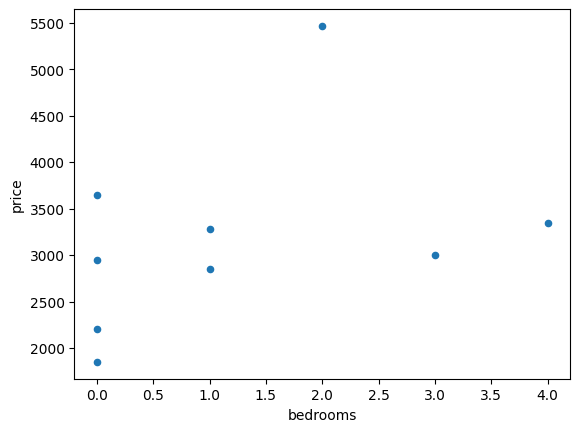

In [67]:
apts_not_unique.plot.scatter('bedrooms', 'price')